In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('iris.data')
labels = pd.DataFrame(data['class'])
data.drop(columns='class', inplace=True)

In [52]:
labels.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [53]:
def classToLabel(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    return 2

In [54]:
labels['class'] = labels['class'].apply(classToLabel)

# 10.4

# a)

For this, we change all the class labels to numbers so that we can more conveniently identify the classes. Since we have 4 features, but can only plot 2 given the graphical tools that we have, I have chosen to plot petal width and petal length, as those separated the classes very well in my opinion.

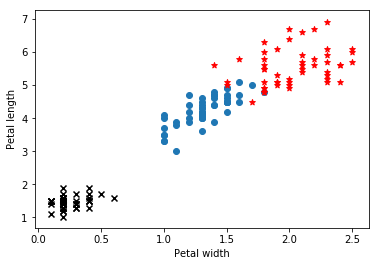

In [55]:
plt.scatter(data[labels['class']==0]['petal width'], data[labels['class']==0]['petal length'], marker='x', c='k')
plt.scatter(data[labels['class']==1]['petal width'], data[labels['class']==1]['petal length'])
plt.scatter(data[labels['class']==2]['petal width'], data[labels['class']==2]['petal length'], marker='*', c='r')
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.show()

# b)

For this problem, we first find the covariance matrix using a numpy library. We can then determine all of the eigenvalues and eigenvectors associated with this covariance matrix, order them, and choose the two eigenvectors with the highest corresponding eigenvalues. This will ensure that the most variance is retained in the dataset. We can then create our change of base matrix from these two eigenvectors and plot the data using the new base, which is 2-dimensional rather than 4-dimensional. We cannot label the axes of the graph because we the principal components will have parts of each feature in them.

In [132]:
covmat = np.matrix(data.cov())
eigenvalues, eigenvectors = np.linalg.eig(covmat)
first_component = eigenvectors[np.argsort(eigenvalues)[-1]]
second_component = eigenvectors[np.argsort(eigenvalues)[-2]]

In [129]:
Q = np.vstack((first_component, second_component))
x = np.matrix(data)
A = np.array(x * Q.T)

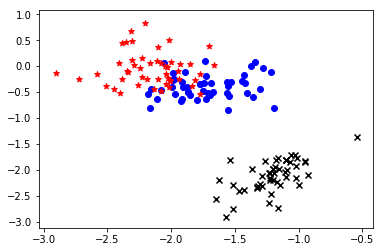

In [130]:
plt.scatter(A[labels['class']==0][:,0].ravel(), A[labels['class']==0][:,1].ravel(), marker='x', c='k')
plt.scatter(A[labels['class']==1][:,0].ravel(), A[labels['class']==1][:,1].ravel(), marker='o', c='b')
plt.scatter(A[labels['class']==2][:,0].ravel(), A[labels['class']==2][:,1].ravel(), marker='*', c='r')
plt.show()